<a href="https://colab.research.google.com/github/nuo24/web_crawler/blob/main/INFO213_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## College of Computing and Informatics, Drexel University

## INFO 213: Data Science Programming II

## Final Project

---



### Project Title: Hotel Booking

### Student(s): Abby Volk, Hajun Lee, Jerold Pinga, Nathan Okolo

### Date: August 30, 2021

---



### **Consolidated EDA**


---



**Business Understanding**

The dataset we choose is called hotel booking from Kaggle. This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including bookings that arrived and bookings that were canceled. This data was collected with the aim of developing prediction models to classify a hotel booking׳s likelihood to be canceled. To measure the effectiveness of a good prediction algorithm we could apply the same algorithm to another dataset and analyze the results. We will be predicting the likelihood of a hotel booking being canceled.

Dataset: https://www.kaggle.com/mojtaba142/hotel-booking

Dataset Origin: https://www.sciencedirect.com/science/article/pii/S2352340918315191

**Data Understanding**

**hotel:** Type of hotel, either resort hotel or city hotel. This is categorical.

**is_canceled:** Value indicating if the booking was canceled (1) or not (0). This is categorical.

**lead_time:** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date. This is an integer.

**arrival_date_year:** Year of arrival date, this is an integer.

**arrival_date_month:** Month of arrival date with 12 categories: “January” to “December”, this is categorical.

**arrival_date_week_number:** Week number of the arrival date, this is an integer.

**arrival_date_day_of_month:** Day of the month of the arrival date, this is an integer.

**stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel. This is an integer.

**stays_in_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel. This is an integer.

**adults:** Number of adults, this is an integer.

**children:** Number of children, this is an integer.

**babies:** Number of babies, this is an integer.

**meal:** Type of meal booked. Categories are presented in standard hospitality meal packages:

Undefined/SC – no meal package;

BB – Bed & Breakfast;

HB – Half board (breakfast and one other meal – usually dinner);

FB – Full board (breakfast, lunch and dinner)

This is categorical.

**country:** Country of origin. Categories are represented in the ISO 3155–3:2013 format. This is categorical.

**market_segment:** 	Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”. This is categorical.

**distribution_channel:** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”. This is categorical.

**is_repeated_guest:** Value indicating if the booking name was from a repeated guest (1) or not (0). This is categorical.

**previous_cancellations:** Number of previous bookings that were cancelled by the customer prior to the current booking. This is an integer.

**previous_bookings_not_canceled:** Number of previous bookings not cancelled by the customer prior to the current booking. This is an integer.

**reserved_room_type:** Code of room type reserved. Code is presented instead of designation for anonymity reasons. This is categorical.

**assigned_room_type:** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. This is categorical.

**booking_changes:** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation. This is an integer.

**deposit_type:** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

No Deposit – no deposit was made;

Non Refund – a deposit was made in the value of the total stay cost;

Refundable – a deposit was made with a value under the total cost of stay.

This is categorical.

**agent:** ID of the travel agency that made the booking, this is categorical.

**company:** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons. This is categorical.

**days_in_waiting_list:** Number of days the booking was in the waiting list before it was confirmed to the customer. This is an integer.

**customer_type:** Type of booking, assuming one of four categories:

Contract - when the booking has an allotment or other type of contract associated to it;

Group – when the booking is associated to a group;

Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;

Transient-party – when the booking is transient, but is associated to at least other transient booking

This is categorical.

**adr:** Average Daily Rate, this is numeric.

**required_car_parking_spaces:** Number of car parking spaces required by the customer. This is an integer.

**total_of_special_requests:** Number of special requests made by the customer (e.g. twin bed or high floor). This is an integer.

**reservation_status:** Reservation last status, assuming one of three categories:

Canceled – booking was canceled by the customer;

Check-Out – customer has checked in but already departed;

No-Show – customer did not check-in and did inform the hotel of the reason why

This is categorical.

**reservation_status_date:** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel. This is a date datatype.


In [ ]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_booking.csv to hotel_booking.csv


In [ ]:
# To load the uploaded file into a pandas dataframe:
import io
hoteldf = pd.read_csv(io.BytesIO(uploaded['hotel_booking.csv']))

In [ ]:
hoteldf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
# Looking at the data description at Kaggle, we know that the columns:
# 'name', 'email', 'phone number', and 'credit_card' are artificially made, so let's remove them
hoteldf.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)

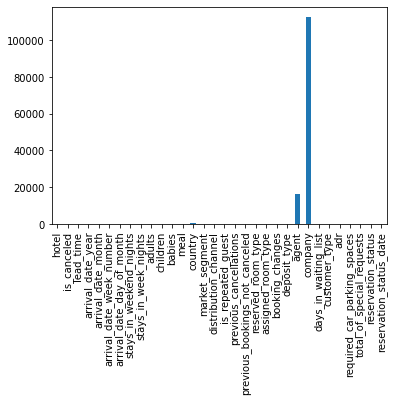

In [ ]:
hoteldf.isna().sum().plot(kind='bar');

* Peeking at where the original dataset came from, we could see the following notion: "For example, if a booking “Agent” is defined as “NULL” it means that the booking did not come from a travel agent."
* Thus, we would not discard the two columns 'agent' and 'company'
* Source: [Hotel Booking Demand Dataset](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

* We will change the NAs in `"Agent"` to "Non-agents" and all the other values to "Agents"
* The same goes for `"Company"` column

In [ ]:
# Let's convert the columns 'agent' and 'company':
hoteldf["agent"] = hoteldf["agent"].map(lambda x: "Non-Agent" if pd.isnull(x) else "Agent")
hoteldf["company"] = hoteldf["company"].map(lambda x: "Private" if pd.isnull(x) else "Company")

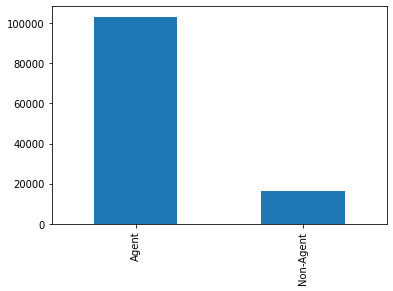

In [ ]:
hoteldf["agent"].value_counts().plot(kind="bar")

* We could see that people book their hotel reservations using travel agencies most of the time.

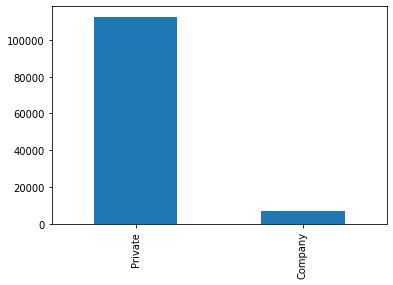

In [ ]:
hoteldf["company"].value_counts().plot(kind="bar")

* It seems that people tend to book and pay for reservations by themselves instead of using intermediary companies.

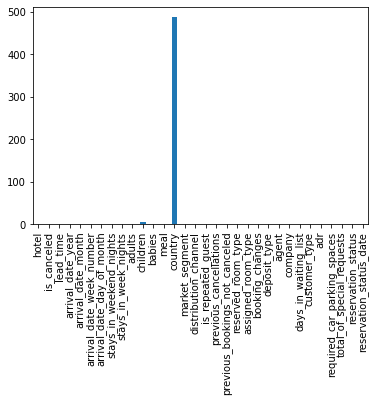

In [ ]:
hoteldf.isna().sum().plot(kind='bar');

In [ ]:
# We can't really predict countries or children that are missing, or try to impute them so let's get rid of the rows with countries missing:
hoteldf.dropna(subset=["country"], inplace=True)
hoteldf.dropna(subset=["children"], inplace=True)

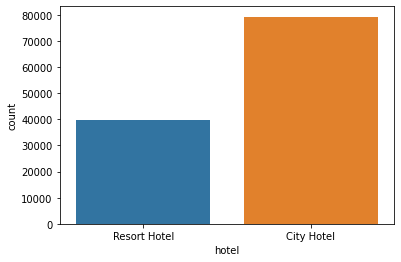

In [ ]:
import seaborn as sns
sns.countplot(data=hoteldf , x="hotel")

There are more city hotels than Resort Hotels.

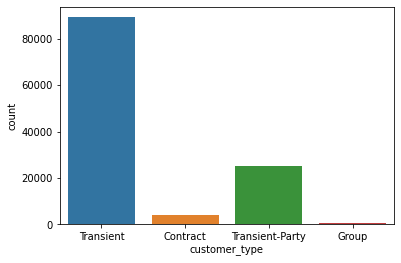

In [ ]:
import seaborn as sns
sns.countplot(data=hoteldf , x="customer_type")

Most cutomer types are transient meaning the booking is not part of a group or contract.

Text(0, 0.5, 'Frequency')

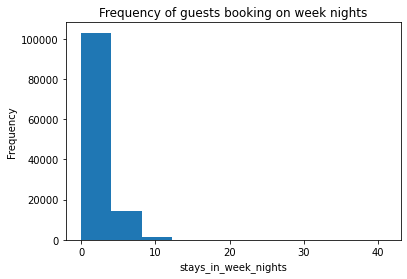

In [ ]:
# View guest week-night booking distribution

fig, ax = plt.subplots()
# Histogram
ax.hist(hoteldf['stays_in_week_nights'])
# Title and labels
ax.set_title('Frequency of guests booking on week nights')
ax.set_xlabel('stays_in_week_nights')
ax.set_ylabel('Frequency')

There are more guests staying for about 5 week nights. Few guests stay more than 10 week nights.

In [ ]:
# View most frequent months people like to travel
# Let's first convert the "arrival_date_month" column to ordinal categorical variables
months = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12} # A dictionary for the months to be used to sort

In [ ]:
sorted = hoteldf["arrival_date_month"].value_counts().sort_index(key = lambda x: x.map(months))

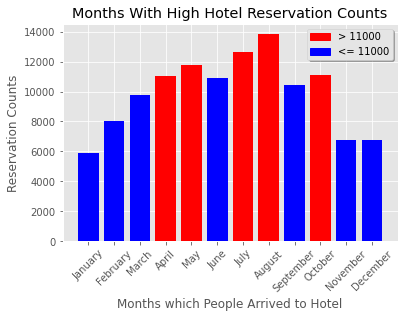

In [ ]:
import matplotlib.patches as mpatches
# Create customized legend
red_patch = mpatches.Patch(color="red", label="> 11000")
blue_patch = mpatches.Patch(color="blue", label="<= 11000")

# Use ggplot styling, because I like ggplot
plt.style.use("ggplot")

# Plot
fig, ax = plt.subplots()
colors = ["red" if value > 11000 else "blue" for value in sorted.values]
ax.bar(x = sorted.index, height = sorted.values, color = colors)
plt.xticks(rotation=45)
ax.set_title("Months With High Hotel Reservation Counts")
ax.set_ylabel("Reservation Counts")
ax.set_xlabel("Months which People Arrived to Hotel")
ax.legend(handles = [red_patch, blue_patch], fancybox=True, shadow=True, borderpad=0.3);

* _No wonder months with holidays, Easter vacation in April and Summer vacation during July and August, have high hotel reservation counts_

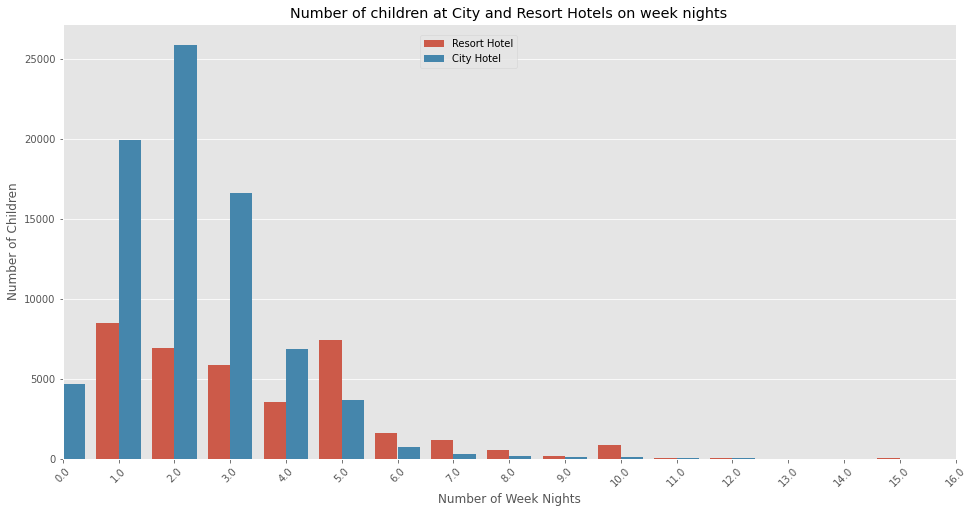

In [ ]:
hoteldf['total_stays_with_kids'] = hoteldf['stays_in_week_nights'] + hoteldf['children'];

plt.figure(figsize=(16,8));
p1 = sns.countplot(data=hoteldf, x='total_stays_with_kids', hue='hotel');
plt.xticks(rotation=45);
plt.xlim(0,16);
p1.set(xlabel ="Number of Week Nights", ylabel = "Number of Children", title ='Number of children at City and Resort Hotels on week nights')
plt.legend(loc=(0.4,0.9));

People with children tend to stay fewer week days at a hotel. There are fewer children with people staying at resort hotels than city hotels.

# **Modeling and Evaluation**


---



In [ ]:
# Importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_booking.csv to hotel_booking.csv


In [ ]:
# To load the uploaded file into a pandas dataframe:
import io
hoteldf = pd.read_csv(io.BytesIO(uploaded['hotel_booking.csv']), index_col=0)

In [ ]:
hoteldf.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
hotel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
# Some variables are redundant.
hoteldf.drop(["arrival_date_week_number", "arrival_date_day_of_month", "reservation_status_date"], axis = 1, inplace = True)

In [ ]:
hoteldf.head()

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,name,email,phone-number,credit_card,match_room_type
hotel,,,,,,,,,,,,,,,,,,,,,
Resort Hotel,0,342,2015,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,1
Resort Hotel,0,737,2015,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,1
Resort Hotel,0,7,2015,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,0
Resort Hotel,0,13,2015,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
Resort Hotel,0,14,2015,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1,Linda Hines,LHines@verizon.com,713-226-5883,************5498,1


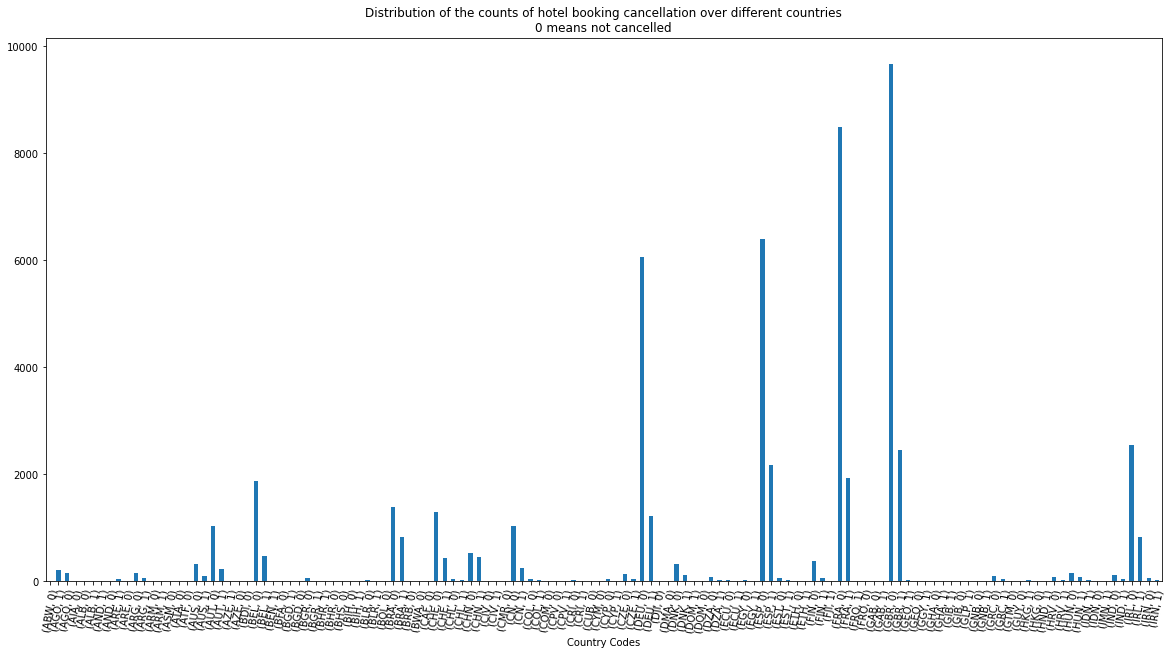

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
hoteldf.groupby(["country"]).is_canceled.value_counts()[0:130].plot(kind="bar")
plt.xlabel("Country Codes")
plt.title("Distribution of the counts of hotel booking cancellation over different countries\n0 means not cancelled")
plt.xticks(rotation=80);

* We can't really find important patterns about how country affects the cancellation of hotel booking.
* It seems that country is independent whether a person cancels hotel booking or not. The graph has a stable pattern where not cancelling is always higher than cancelling.

In [ ]:
# Convert Character variables to Numerical:
listDummy = []
listDummy.append(pd.get_dummies(hoteldf.hotel, drop_first = True))
listDummy.append(pd.get_dummies(hoteldf.arrival_date_month))
listDummy.append(pd.get_dummies(hoteldf.meal))
listDummy.append(pd.get_dummies(hoteldf.market_segment))
listDummy.append(pd.get_dummies(hoteldf.distribution_channel))
listDummy.append(pd.get_dummies(hoteldf.deposit_type))
listDummy.append(pd.get_dummies(hoteldf.agent, drop_first = True))
listDummy.append(pd.get_dummies(hoteldf.company, drop_first = True))
listDummy.append(pd.get_dummies(hoteldf.customer_type))

AttributeError: ignored

In [ ]:
# We only care if the customers received the room they reserved or not:
hoteldf[["match_room_type"]] = hoteldf.assigned_room_type.eq(hoteldf.reserved_room_type)  # Returns a Series of Booleans
hoteldf.match_room_type = hoteldf.match_room_type.apply(lambda x: 1 if x == True else 0)

In [ ]:
hoteldf.drop([ "arrival_date_month", "meal", "country", "market_segment", "distribution_channel",
              "deposit_type", "agent", "company", "customer_type", "reservation_status", "reserved_room_type", "assigned_room_type"], axis = 1, inplace = True)

In [ ]:
# Join the dummy variables:
for dummyVar in listDummy:
    hoteldf = pd.concat([hoteldf, dummyVar], axis = 1)
hoteldf

NameError: ignored

In [ ]:
# We might have some incorrect values such as ADR < 0. Since KBest does not take negative values, we need to handle this.
# Also, negative values in ADR doesn't make sense. So we will set it to be zero. For more info: https://assetsamerica.com/adr-formula-average-daily-rate/

hoteldf.adr = hoteldf.adr.apply(lambda x : 0.0 if x < 0 else x)

In [ ]:
# Let's drop NAs: # There is one single row with a lot of missing values
hoteldf.dropna(inplace=True)

In [ ]:
X = hoteldf.drop("is_canceled", axis = 1)
Y = hoteldf.is_canceled

In [ ]:
# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

LRModel = LogisticRegression(solver="liblinear")
rfe = RFE(LRModel, 40) # select 40 predictor variables
features = rfe.fit(X,Y)

In [ ]:
X.iloc[:,features.support_]

,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,required_car_parking_spaces,total_of_special_requests,total_stays_with_kids,match_room_type,Resort Hotel,August,February,January,March,November,September,BB,FB,HB,SC,Undefined,Aviation,Corporate,Direct,Groups,Offline TA/TO,Online TA,Corporate,Direct,GDS,TA/TO,No Deposit,Non Refund,Refundable,Private,Contract,Group,Transient
0,2,0,0,0,0,0,3,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
1,2,0,0,0,0,0,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
4,2,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,2,0,0,0,0,0,0,0,0,5,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1
119386,3,0,0,0,0,0,0,0,2,5,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
119387,2,0,0,0,0,0,0,0,4,5,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1
119388,2,0,0,0,0,0,0,0,0,5,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1


In [ ]:
features.ranking_

array([14, 15,  3,  4,  1,  1,  1,  1,  1,  1,  1, 16, 13,  1,  1,  1,  1,
        1,  2,  1,  9,  1,  1, 11, 10,  1, 12,  1,  6,  1,  1,  1,  1,  1,
        1,  1,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1, 17,  1,  1,  1,  5,
        1,  1,  1,  1,  7])

* We will use those features to predict our models.
* If our model underfits, then we will think about adding more predictor variables.
* If our model overfits, then we will think about reducing the variables.

In [ ]:
# Indicates strength of features.
features.support_

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True, False])

In [ ]:
X_RFE = X.iloc[:, features.support_]
X_RFE.head()

,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,required_car_parking_spaces,total_of_special_requests,total_stays_with_kids,match_room_type,Resort Hotel,August,February,January,March,November,September,BB,FB,HB,SC,Undefined,Aviation,Corporate,Direct,Groups,Offline TA/TO,Online TA,Corporate,Direct,GDS,TA/TO,No Deposit,Non Refund,Refundable,Private,Contract,Group,Transient
0,2,0,0,0,0,0,3,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
1,2,0,0,0,0,0,4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
4,2,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1


## **Modeling and Evaluation**

* Choose and explain your evaluation metrics that you will use
(i.e., accuracy, precision, recall, F-measure, or a mix of all of them). Why are
these appropriate for analyzing the results of your modeling?


> We will be using accuracy, precision, recall, and F-measure for analyzing the results of our modeling. Since we are predicting if a hotel booking will be canceled or not, accuracy is useful to determine whether the data was classified correctly, given that we have balanced classes. We will compute precision and recall to see if we have errors in our accuracy score being low or too high. These metrics allow us to determine where our errors are and if we are missing features if the accuracy score is too high. Lastly, we will use F-measure to see if either our precision or recall is too low when we evaluate our model.



* Choose the method you will use for dividing your data into
training and testing splits (i.e., are you using Stratified 10-fold cross
validation? Why?). Explain why your chosen method is appropriate or use
more than one method as appropriate.

> We will be using k-fold cross validation for diving our data into training and testing splits. This method is most appropriate because we likely need more data than we have to create a more accurate and unbiased model. The method chosen typically results in less biased estimate of the model. This method allows us to use our limited data to estimate how the model will perform and predict on different data.



* Create at least three different classification/regression models
(e.g., KNN, Logistic regression and Random Forest). Adjust parameters as
appropriate to increase generalization performance (for the test set).

In [ ]:
# Split the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_RFE, Y, test_size = 0.3)

In [ ]:
# KFold Crooss validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed = 2134
kfold = KFold(n_splits=10, random_state=seed)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=10)))

> #### **KNN**



In [ ]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=3)
results4 = cross_val_score(model, X_train, y_train, cv=kfold)
print(results4.mean(), "(+/-", 1.96*results4.std(),")")

0.8118422749039379 (+/- 0.006412534871466604 )


> #### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
results5 = cross_val_score(logreg, X_train, y_train, cv=kfold)
print(results5.mean(), "(+/-", 1.96*results5.std(),")")

0.8048735341701143 (+/- 0.01033569309512694 )


> #### **Random Forest**

In [ ]:
# Bagging:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results2 = cross_val_score(model, X_train, y_train, cv=kfold)
print(results2.mean(), "(+/-", 1.96*results2.std(),")")

0.8123349175039053 (+/- 0.0065629736285278874 )


In [ ]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
import math

num_trees = 100
max_features = math.floor(math.sqrt(X_train.shape[1]))
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results1 = cross_val_score(model, X_train, y_train, cv=kfold)
print(results1.mean(), "(+/-", 1.96*results1.std(),")")

0.8145817107373199 (+/- 0.006199068761357837 )


In [ ]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier

num_trees = 100
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results6 = cross_val_score(model, X_train, y_train, cv=kfold)
print(results6.mean(), "(+/-", 1.96*results6.std(),")")

0.8076370330067248 (+/- 0.01109517934172503 )


In [ ]:
# Stochastic Gradient Boosting Classification

from sklearn.ensemble import GradientBoostingClassifier

num_trees = 100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results7 = cross_val_score(model, X_train, y_train, cv=kfold)
print(results7.mean(), "(+/-", 1.96*results7.std(),")")

0.8068200170229831 (+/- 0.011368965025984562 )


In [ ]:
# Voting Ensemble for Classification

from sklearn.ensemble import VotingClassifier

cart = DecisionTreeClassifier()
num_trees = 100
max_features = math.floor(math.sqrt(X_train.shape[1]))

# create the sub models
estimators = []
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
estimators.append(('Bagging', model1))
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
estimators.append(('RandomForest', model2))
model3 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('AdaBoost', model3))
model4 = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('GradientBoost', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results3.mean(), "(+/-", 1.96*results3.std(),")")

0.8101722097910422 (+/- 0.009814166078776115 )


In [ ]:
names = ["RF", "Bagging" , "Voting Ensemble", "KNN", "LR", "Ada", "SGD"]
# Append the models
resultsList = []
resultsList.append(results1)
resultsList.append(results2)
resultsList.append(results3)
resultsList.append(results4)
resultsList.append(results5)
resultsList.append(results6)
resultsList.append(results7)

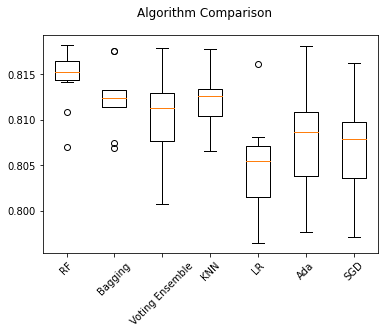

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(resultsList)
ax.set_xticklabels(names, rotation=45)
plt.show()

Comparing the cross validation scores, we can see that random forest has the best results.

# Using the top four models based on their Cross Validation Score:
* Random Forest
* Bagging
* Voting Ensemble
* KNN

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
import math

num_trees = 100
max_features = math.floor(math.sqrt(X_train.shape[1]))
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("Class metrics:", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.8170171012054949
Precision:  0.7928061313360042
Recall score:  0.6869670213568787
f1 score:  0.7361015647111147
Class metrics:               precision    recall  f1-score   support

           0       0.83      0.89      0.86     22419
           1       0.79      0.69      0.74     13251

    accuracy                           0.82     35670
   macro avg       0.81      0.79      0.80     35670
weighted avg       0.82      0.82      0.81     35670

[[20040  2379]
 [ 4148  9103]]


In [ ]:
# Bagging:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("Class metrics:", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.8141295206055509
Precision:  0.7835060375096343
Recall score:  0.6904384574749075
f1 score:  0.7340340179717586
Class metrics:               precision    recall  f1-score   support

           0       0.83      0.89      0.86     22419
           1       0.78      0.69      0.73     13251

    accuracy                           0.81     35670
   macro avg       0.81      0.79      0.80     35670
weighted avg       0.81      0.81      0.81     35670

[[19891  2528]
 [ 4102  9149]]


In [ ]:
# Voting Ensemble for Classification

from sklearn.ensemble import VotingClassifier

cart = DecisionTreeClassifier()
num_trees = 100
max_features = math.floor(math.sqrt(X_train.shape[1]))

# create the sub models
estimators = []
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
estimators.append(('Bagging', model1))
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
estimators.append(('RandomForest', model2))
model3 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('AdaBoost', model3))
model4 = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('GradientBoost', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("Class metrics:", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.8127558172133446
Precision:  0.8614961496149615
Recall score:  0.5909742660931251
f1 score:  0.7010429255628664
Class metrics:               precision    recall  f1-score   support

           0       0.80      0.94      0.86     22419
           1       0.86      0.59      0.70     13251

    accuracy                           0.81     35670
   macro avg       0.83      0.77      0.78     35670
weighted avg       0.82      0.81      0.80     35670

[[21160  1259]
 [ 5420  7831]]


In [ ]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=3)
KNNmodel.fit(X_train, y_train)
y_pred = KNNmodel.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall score: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))
print("Class metrics:", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.7790019624334175
Precision:  0.7056389825314128
Recall score:  0.695041883631424
f1 score:  0.7003003459681404
Class metrics:               precision    recall  f1-score   support

           0       0.82      0.83      0.82     22419
           1       0.71      0.70      0.70     13251

    accuracy                           0.78     35670
   macro avg       0.76      0.76      0.76     35670
weighted avg       0.78      0.78      0.78     35670

[[18577  3842]
 [ 4041  9210]]


* Which attributes from your analysis are most important? Why?
Does it make sense?


> Using feature selection, and removing extraneous variables, we were able to utilize 40 attributes for our model. The most important attributes from our analysis are those with the best feature rankings of 1. This is because they have the greatest strength in contributing to predicting the target attribute. A few examples of these strong attributes are previous_cancellations, previous_bookings_not_canceled, booking_changes, required_car_parking_spaces,  and	total_of_special_requests	among several others. These make sense because they have greater influence in predicting whether a booking will be canceled.

* Analyze the results using your chosen method of evaluation. Use
visualizations of the results to bolster the analysis.


> When running our models for the first time, we were seeing perfect results for accuracy, precision, recall, and f1 scores. Knowing that every model has flaws, we knew there was something wrong with our data. To fix this, Hajun found that the 'reservation_status' attribute held the record for last status of a customer. One of the status' was cancel booking as the last activity, so if someone canceled that validated the target variable. To fix this, the 'reservation_status' attribute was dropped.

In [ ]:
#Random Forest
# from sklearn.ensemble import RandomForestClassifier
# import math

# num_trees = 100
# max_features = math.floor(math.sqrt(X_train.shape[1]))
# model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt = 'd', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
sns.barplot(data=df,x="hotel",y="is_canceled")

NameError: ignored

* Discuss the advantages of each model for each classification task,
if any. If there are not advantages, explain why. Is any model better than
another? Is the difference significant with 95% confidence? Use proper
statistical comparison methods

> Overall, random forest does the best in all evaluation metrics. Compared to the other models, the voting ensemble has the highest precision metrics out of all the models used. We would use the voting ensemble since it has the highest chance of correctly predicting booking cancelation. However, for the f1 score which is the harmonic mean of precision and recall, we will use random forest because it has the best overall metrics for all classes.

> Looking at the 95% confidence intervals, the top 4 models are not significantly different. By comparing the mean score of the cross validation results with the 95% confidence interval, there seems to be no significant difference.

## **Deployment**

* How useful is your model for interested parties (i.e., the
companies or organizations that might want to use it for prediction)? How
would you measure the model's value if it was used? How would your
deploy your model for interested parties? What other data should be
collected? How often would the model need to be updated, etc.?

>This model could be useful for other hotel or resort management companies. Using this model, companies could predict their own booking cancellation rates and use the outcome to make changes to their hotels or resorts to better accomidate customers and decrease cancellation rates. If the model was used, the models value could be measured based on our current models baseline statistics. It could also be measured based on established performance range expectations for the model such as minimum, maximum or mean results that meet expected values. We could deploy our model for interested parties by making it into a web-service for ease of use. Other data that should be collected are additional features that interested parties manage that would impact their results. The model would need to be updated when new data is available. If that data is deviating from the standard, the model should be retrained.

## **Exceptional Work**

**Additional analyses**

Some ideas we have for the future if we were to continue with the deployment of these models are listed below.

 Hyperparameter tunning
 - KNN: Try out different k values.
 - Randon forest: Try different m try values and number of trees.
 - Voting emsemble: Add more models to vote upon.

In conducting these tunning methods by setting the correct combination of hyperparameters, we could fully optimize our models and maximize the performance.